# load data and define column names

In [172]:
# load data
from scipy.io import arff
import pandas as pd

data = arff.loadarff('1year.arff')
df = pd.DataFrame(data[0])

In [173]:
# define column names
column_names = ['net profit / total assets',
                'total liabilities / total assets',
                'working capital / total assets',
                'current assets / short-term liabilities',
                '[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365',
                'retained earnings / total assets',
                'EBIT / total assets',
                'book value of equity / total liabilities',
                'sales / total assets',
                'equity / total assets',
                '(gross profit + extraordinary items + financial expenses) / total assets',
                'gross profit / short-term liabilities',
                '(gross profit + depreciation) / sales',
                '(gross profit + interest) / total assets',
                '(total liabilities * 365) / (gross profit + depreciation)',
                '(gross profit + depreciation) / total liabilities',
                'total assets / total liabilities',
                'gross profit / total assets',
                'gross profit / sales',
                '(inventory * 365) / sales',
                'sales (n) / sales (n-1)',
                'profit on operating activities / total assets',
                'net profit / sales',
                'gross profit (in 3 years) / total assets',
                '(equity - share capital) / total assets',
                '(net profit + depreciation) / total liabilities',
                'profit on operating activities / financial expenses',
                'working capital / fixed assets',
                'logarithm of total assets',
                '(total liabilities - cash) / sales',
                '(gross profit + interest) / sales',
                '(current liabilities * 365) / cost of products sold',
                'operating expenses / short-term liabilities',
                'operating expenses / total liabilities',
                'profit on sales / total assets',
                'total sales / total assets',
                '(current assets - inventories) / long-term liabilities',
                'constant capital / total assets',
                'profit on sales / sales',
                '(current assets - inventory - receivables) / short-term liabilities',
                'total liabilities / ((profit on operating activities + depreciation) * (12/365))',
                'profit on operating activities / sales',
                'rotation receivables + inventory turnover in days',
                '(receivables * 365) / sales',
                'net profit / inventory',
                '(current assets - inventory) / short-term liabilities',
                '(inventory * 365) / cost of products sold',
                'EBITDA (profit on operating activities - depreciation) / total assets',
                'EBITDA (profit on operating activities - depreciation) / sales',
                'current assets / total liabilities',
                'short-term liabilities / total assets',
                '(short-term liabilities * 365) / cost of products sold)',
                'equity / fixed assets',
                'constant capital / fixed assets',
                'working capital',
                '(sales - cost of products sold) / sales',
                '(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)',
                'total costs /total sales',
                'long-term liabilities / equity',
                'sales / inventory',
                'sales / receivables',
                '(short-term liabilities *365) / sales',
                'sales / short-term liabilities',
                'sales / fixed assets',
                'bankrupcy']

In [174]:
# replace column names
df.columns = column_names

# replace label column values to 0 or 1
df.bankrupcy = df.bankrupcy.map({b'0': 0, b'1': 1})

# drop entirely duplicated rows
df.drop_duplicates(inplace=True)

# reset index
df.reset_index(inplace=True,drop=True)

# order data and fill null data

In [175]:
# Standardize every column
from sklearn.preprocessing import StandardScaler
df_std = df[list(df)].copy()
features = list(df_std)
scaler = StandardScaler().fit(df_std[features])
df_std[features] = scaler.transform(df_std[features])

# isolate rows with null
null_data = df_std[df_std.isnull().any(axis=1)]

# display the number of rows of data containing null value
print('rows of data containing null value: '+ str(null_data.shape[0]))

# isolate rows without null
df_not_null_data = df_std[df_std.notnull().all(axis=1)]

# display the number of rows of data containing null value
print('rows of data containing no null values: '+ str(df_not_null_data.shape[0]))

# concat data with null values on top of data without null values
df_std = pd.concat([null_data,df_not_null_data])

# impute rows with null values with KNNImputer with a n_neighbor of 7
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=7)
df_std = pd.DataFrame(data=imputer.fit_transform(df_std),columns=list(df_std))

# reset index
df_std.reset_index(inplace=True,drop=True)

# UnStandardize every column
df_std[features] = scaler.inverse_transform(df_std[features])

# reformat label column to int64
df_std.bankrupcy = df_std.bankrupcy.astype('int64')

rows of data containing null value: 3794
rows of data containing no null values: 3151


In [176]:
# preview what we have so far
df_std.head()

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,bankrupcy
0,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
1,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
2,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
3,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0
4,0.228220,0.49794,0.35969,1.7502,-47.7170,0.00000,0.281390,1.00830,1.9786,0.50206,...,0.139320,0.45457,0.85891,0.023002,3.4028,8.9949,88.444,4.1269,12.2990,0


In [177]:
# spliting data into X and y
X = df_std[column_names[:-1]].copy()
y = df_std[['bankrupcy']].copy()

In [178]:
# remove all any features with variance of > 95%
from sklearn.feature_selection import VarianceThreshold
def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    new_data = data[data.columns[selector.get_support(indices=True)]]
    new_data_col = list(new_data)
    orig_data_col = list(data)
    print(list(set(orig_data_col) - set(new_data_col)))
    return new_data

X = variance_threshold_selector(X, 0.95)
X.head()

['logarithm of total assets']


,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,working capital,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets
0,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,2304.6,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870
1,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,6332.7,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078
2,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,20545.0,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497
3,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,3186.6,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980
4,0.228220,0.49794,0.35969,1.7502,-47.7170,0.00000,0.281390,1.00830,1.9786,0.50206,...,7616.8,0.139320,0.45457,0.85891,0.023002,3.4028,8.9949,88.444,4.1269,12.2990


In [63]:
# use Maximal Information Coefficient to measure feature-feature correlation between all features
from IPython.display import clear_output
from minepy import MINE
import numpy as np

mine = MINE(alpha=0.6, c=15, est="mic_approx")

df_mic_result = pd.DataFrame(columns=['first_feature','second_feature','MIC'])
n = 0
list_of_pairs = []
for first_index in range(0, len(list(X))):
    first = list(X)[first_index]
    for second_index in range(0, len(list(X))):
        second = list(X)[second_index]
        clear_output(wait=True)
        if first == second:
            continue
        if sorted([first,second]) in list_of_pairs:
            continue
        %time mine.compute_score(X[first].to_numpy(), X[second].to_numpy())
        mic_score = mine.mic()
        df_mic_result.loc[n] = [first,second,mic_score]
        n += 1
        list_of_pairs.append(sorted([first,second]))
        print('Current progress:',np.round(first_index/len(list(X))*100,2),'%')
        
df_mic_result

,first_feature,second_feature,MIC
0,net profit / total assets,total liabilities / total assets,0.151332
1,net profit / total assets,working capital / total assets,0.177519
2,net profit / total assets,current assets / short-term liabilities,0.168905
3,net profit / total assets,[(cash + short-term securities + receivables -...,0.175059
4,net profit / total assets,retained earnings / total assets,0.246097
...,...,...,...
1948,sales / receivables,sales / short-term liabilities,0.169685
1949,sales / receivables,sales / fixed assets,0.083191
1950,(short-term liabilities *365) / sales,sales / short-term liabilities,1.000000
1951,(short-term liabilities *365) / sales,sales / fixed assets,0.124348


In [179]:
# rank MIC score from 1 to 0 between every feature pair
df_mic_result = df_mic_result.sort_values(by=['MIC','first_feature'],ascending=False)

features_to_remove = ['gross profit / total assets',
                      '(gross profit + interest) / total assets',
                      'total liabilities / total assets',
                      '(total liabilities * 365) / (gross profit + depreciation)',
                      '(short-term liabilities *365) / sales',
                      '(receivables * 365) / sales',
                      '(inventory * 365) / sales',
                      '(current liabilities * 365) / cost of products sold',
                      '(short-term liabilities * 365) / cost of products sold)',
                      'book value of equity / total liabilities',
                      'equity / total assets',
                      '(gross profit + depreciation) / total liabilities',
                      'net profit / total assets',
                      'gross profit / sales',
                      'EBITDA (profit on operating activities - depreciation) / total assets',
                      '(gross profit + interest) / sales',
                      '(gross profit + extraordinary items + financial expenses) / total assets',
                      'constant capital / fixed assets']

df_mic_result[df_mic_result.MIC > 0.9]

,first_feature,second_feature,MIC
363,EBIT / total assets,(gross profit + interest) / total assets,1.000000
367,EBIT / total assets,gross profit / total assets,1.000000
731,(gross profit + interest) / total assets,gross profit / total assets,1.000000
76,total liabilities / total assets,total assets / total liabilities,1.000000
777,(total liabilities * 365) / (gross profit + de...,(gross profit + depreciation) / total liabilities,1.000000
1950,(short-term liabilities *365) / sales,sales / short-term liabilities,1.000000
1759,(receivables * 365) / sales,sales / receivables,1.000000
1045,(inventory * 365) / sales,sales / inventory,0.999712
1444,(current liabilities * 365) / cost of products...,(short-term liabilities * 365) / cost of produ...,0.999424
1475,operating expenses / short-term liabilities,(short-term liabilities * 365) / cost of produ...,0.997993


In [180]:
# remove correlated feature pairs but one when they have 0.9 or higher MIC score 
X = X.drop(axis=1, labels=features_to_remove)
print(X.shape)
X.head()

(6945, 45)


,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,sales / total assets,gross profit / short-term liabilities,(gross profit + depreciation) / sales,total assets / total liabilities,sales (n) / sales (n-1),...,equity / fixed assets,working capital,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,sales / short-term liabilities,sales / fixed assets
0,0.47225,1.9447,14.7860,0.00000,0.258340,1.6996,0.51680,0.158350,2.0005,1.429300,...,17.8660,2304.6,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,3.4000,60.9870
1,0.26713,1.5548,-1.1523,0.00000,0.309060,1.3090,0.64184,0.244350,1.4369,1.428300,...,1.2098,6332.7,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,2.7185,5.2078
2,0.45879,2.4928,51.9520,0.14988,0.092704,1.0571,0.30163,0.094257,3.2537,1.506900,...,2.4524,20545.0,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,4.2228,5.5497
3,0.22960,1.4063,-7.3128,0.18732,0.187320,1.1559,0.33147,0.121820,1.6307,1.218657,...,1.8839,3186.6,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,2.8692,7.8980
4,0.35969,1.7502,-47.7170,0.00000,0.281390,1.9786,0.58691,0.148120,2.0083,1.727800,...,3.1209,7616.8,0.139320,0.45457,0.85891,0.023002,3.4028,8.9949,4.1269,12.2990


# generate new features

In [181]:
# use feature tools to generate more features
import featuretools as ft

# Make an entityset and add the entity
es = ft.EntitySet(id = 'bankruptcy')
es.entity_from_dataframe(entity_id = 'data', dataframe = X, 
                         index = 'index')

# Run deep feature synthesis with transformation primitives
%time feature_matrix, feature_defs = ft.dfs(entityset = es, target_entity = 'data',trans_primitives = ['add_numeric', 'multiply_numeric','divide_numeric','subtract_numeric'],max_depth = 1,chunk_size=.01,n_jobs = -1)


feature_matrix

2020-01-29 18:51:37,339 featuretools.entityset - WARNING    index index not found in dataframe, creating new integer column
EntitySet scattered to 4 workers in 5 seconds
Wall time: 3min 42s


,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,sales / total assets,gross profit / short-term liabilities,(gross profit + depreciation) / sales,total assets / total liabilities,sales (n) / sales (n-1),...,(inventory * 365) / cost of products sold - working capital / total assets,net profit / inventory - net profit / sales,(total liabilities - cash) / sales - profit on sales / total assets,(current assets - inventory - receivables) / short-term liabilities - sales / fixed assets,net profit / sales - operating expenses / total liabilities,EBIT / total assets - sales / fixed assets,EBITDA (profit on operating activities - depreciation) / sales - sales / short-term liabilities,(net profit + depreciation) / total liabilities - profit on sales / sales,current assets / short-term liabilities - EBITDA (profit on operating activities - depreciation) / sales,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365 - sales / receivables
index,,,,,,,,,,,,,,,,,,,,,
0,0.472250,1.94470,14.7860,0.00000,0.258340,1.69960,0.516800,0.158350,2.0005,1.429300,...,99.657750,0.387410,0.063530,-60.900578,-2.864560,-60.728660,-3.260390,0.318620,1.805090,11.5128
1,0.267130,1.55480,-1.1523,0.00000,0.309060,1.30900,0.641840,0.244350,1.4369,1.428300,...,96.104870,0.758110,0.103640,-4.885780,-1.237440,-4.898740,-2.495570,0.131680,1.331870,-5.1033
2,0.458790,2.49280,51.9520,0.14988,0.092704,1.05710,0.301630,0.094257,3.2537,1.506900,...,83.885210,0.224418,0.027930,-5.148310,-0.313028,-5.456996,-4.156635,0.272525,2.426635,48.3373
3,0.229600,1.40630,-7.3128,0.18732,0.187320,1.15590,0.331470,0.121820,1.6307,1.218657,...,65.706400,0.623660,0.080520,-7.604960,-0.207870,-7.710680,-2.753190,0.199800,1.290290,-11.6286
4,0.359690,1.75020,-47.7170,0.00000,0.281390,1.97860,0.586910,0.148120,2.0083,1.727800,...,124.270310,0.277150,-0.041840,-12.220366,-3.304650,-12.017610,-3.990770,0.342490,1.614070,-56.7119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6940,0.585980,2.66240,33.5180,0.00072,0.189720,1.56690,0.538220,0.139290,2.7423,0.833650,...,120.044020,0.233661,-0.024840,-25.183630,-3.682001,-25.269280,-4.338440,0.362540,2.555640,29.4599
6941,-0.222330,0.60119,-62.6300,0.00000,0.014544,2.08020,0.026088,0.060000,1.6192,1.086200,...,18.619330,0.085062,0.274474,-3.084369,-3.336623,-3.114256,-3.769918,0.185450,0.639708,-72.7100
6942,-0.047216,0.92568,-7.2952,0.00000,-0.090374,9.13450,-0.142260,-0.003698,1.4174,1.037700,...,4.982616,-0.719699,0.067308,-22.143213,-13.146011,-22.270374,-14.393550,-0.050369,0.940230,-28.0852


In [182]:
import numpy as np

df_6945features = feature_matrix.copy()

#convert all infinities to NaN
df_6945features.replace(to_replace= [np.inf, -np.inf], value = np.nan,inplace=True)

# drop all columns with NaN after feature tooling
df_6945features.dropna(axis=1, inplace=True)

# discover the remaining amount of features
print(df_6945features.shape[1])

# rename df to reflect the amount of columns remaining
df_3587features = df_6945features.copy()

3587


# Checkpoint: Save df_3587features as Pickle 

In [198]:
import pickle
df_3587features.to_pickle("df_3587features.pickle")
df_3587features_read = pd.read_pickle('df_3587features.pickle')
assert df_3587features_read.equals(df_3587features)

# Train-Test Split with all imputed data in the training set

In [201]:
# Standardize every remaining feature
features = list(df_3587features_read)
scaler = StandardScaler().fit(df_3587features_read[features])
df_3587features_read[features] = scaler.transform(df_3587features_read[features])

# split df_3587features_read into imputed and non-imputed sets
df_imputed = df_3587features_read.iloc[:null_data.shape[0]]
df_non_null = df_3587features_read.iloc[null_data.shape[0]:]

# split labels into imputed and non-imputed sets
y = df_std[['bankrupcy']].copy()
y_imputed = y.iloc[:null_data.shape[0]]
y_non_null = y.iloc[null_data.shape[0]:]

# set random state, and split data
random = 42
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_non_null, y_non_null, test_size=0.2, random_state=random)

# add imputed data on top of the training set
X_train = pd.concat([df_imputed,X_train])
y_train = pd.concat([y_imputed,y_train])

# convery column vector of training labels to 1D array
y_train = y_train.values.ravel()

# balance classes by ADASYN Oversampling

In [202]:
# check how balanced the training set is
from collections import Counter
print('Resampled dataset shape %s' % Counter(y_train))

Resampled dataset shape Counter({0: 6049, 1: 265})


In [203]:
# oversample the training set using ADASYN
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=random,n_jobs=-1)
X_train, y_train = ada.fit_resample(X_train, y_train)

C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [204]:
# confirm training dataset is now balanced
print('Resampled dataset shape %s' % Counter(y_train))

Resampled dataset shape Counter({0: 6049, 1: 6016})


In [205]:
# reorganize X_train back to a Dataframe
X_train = pd.DataFrame(data=X_train,columns=list(df_3587features_read))
X_train

,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,sales / total assets,gross profit / short-term liabilities,(gross profit + depreciation) / sales,total assets / total liabilities,sales (n) / sales (n-1),...,(inventory * 365) / cost of products sold - working capital / total assets,net profit / inventory - net profit / sales,(total liabilities - cash) / sales - profit on sales / total assets,(current assets - inventory - receivables) / short-term liabilities - sales / fixed assets,net profit / sales - operating expenses / total liabilities,EBIT / total assets - sales / fixed assets,EBITDA (profit on operating activities - depreciation) / sales - sales / short-term liabilities,(net profit + depreciation) / total liabilities - profit on sales / sales,current assets / short-term liabilities - EBITDA (profit on operating activities - depreciation) / sales,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365 - sales / receivables
0,0.066508,-0.052036,0.007433,-0.009677,-0.010524,-0.036566,-0.054591,-0.012174,-0.088926,-0.012485,...,0.001086,0.009960,-0.012768,0.029015,0.011341,0.029152,0.057476,-0.008916,-0.020322,0.007801
1,0.027842,-0.081345,0.007005,-0.009677,-0.004251,-0.040837,-0.031188,-0.011639,-0.117714,-0.012488,...,-0.001931,0.010080,-0.012746,0.039862,0.059015,0.039968,0.064422,-0.015517,-0.024656,0.007355
2,0.063971,-0.010834,0.008430,0.014954,-0.031011,-0.043591,-0.094864,-0.012573,-0.024915,-0.012275,...,-0.012306,0.009907,-0.012787,0.039811,0.086099,0.039860,0.049335,-0.010544,-0.014629,0.008789
3,0.020768,-0.092508,0.006840,0.021107,-0.019308,-0.042511,-0.089279,-0.012402,-0.107815,-0.013056,...,-0.027742,0.010037,-0.012758,0.039335,0.089180,0.039423,0.062082,-0.013112,-0.025036,0.007180
4,0.045290,-0.066657,0.005755,-0.009677,-0.007673,-0.033516,-0.041469,-0.012238,-0.088528,-0.011676,...,0.021984,0.009924,-0.012825,0.038442,-0.001553,0.038589,0.050842,-0.008073,-0.022071,0.005970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12060,0.012726,-0.087337,0.006462,-0.009677,-0.039261,-0.033018,-0.139694,-0.012981,-0.122883,-0.013180,...,-0.035953,0.009851,-0.012619,0.039877,0.017655,0.039977,0.041283,-0.018125,-0.023341,0.006689
12061,0.025072,-0.072105,0.006874,-0.009677,-0.043046,-0.036369,-0.154493,-0.013077,-0.117588,-0.013218,...,-0.030962,0.009826,-0.012579,0.039919,0.022759,0.040018,0.046122,-0.018852,-0.021336,0.007170
12062,0.017938,-0.078044,0.006091,-0.013738,-0.043255,-0.039484,-0.154484,-0.013134,-0.111558,-0.013352,...,-0.008190,0.009824,-0.012576,0.040140,0.030454,0.040240,0.050735,-0.020711,-0.022332,0.006296
12063,0.027589,-0.073563,0.006524,-0.024184,-0.035122,-0.037909,-0.127420,-0.012890,-0.112938,-0.012896,...,-0.013919,0.009862,-0.012623,0.039862,0.026855,0.039976,0.052482,-0.018446,-0.021908,0.006841


# helper functions

In [206]:
# helper function to plot ROC curve
from matplotlib.colors import ListedColormap
from sklearn.metrics import roc_curve, confusion_matrix
from sklearn.metrics import auc as aauc

# Adopted from: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

def plot_roc(clf, X_test, y_test, name, ax, show_thresholds=False):
    y_pred_rf = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thr = roc_curve(y_test, y_pred_rf)

    ax.plot([0, 1], [0, 1], 'k--');
    ax.plot(fpr, tpr, label='{}, AUC={:.2f}'.format(name, aauc(fpr, tpr)));
    ax.scatter(fpr, tpr);

    if show_thresholds:
        for i, th in enumerate(thr):
            ax.text(x=fpr[i], y=tpr[i], s="{:.2f}".format(th), fontsize=10,
                     horizontalalignment='left', verticalalignment='top', color='black',
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.1));

    ax.set_xlabel('False positive rate', fontsize=18);
    ax.set_ylabel('True positive rate', fontsize=18);
    ax.tick_params(axis='both', which='major', labelsize=18);
    ax.grid(True);
    ax.set_title('ROC Curve', fontsize=18)

In [207]:
# use Recursive Feature Elimination to find the best set of features then output as df
from sklearn.feature_selection import RFE
def RFE_with_df_output(X,y,estimator_,n_features_to_select_,step_):
    selector = RFE(estimator=estimator_, n_features_to_select = n_features_to_select_, step=step_)
    selector = selector.fit(X,y)
    X_reduced = X[X.columns[selector.get_support(indices=True)]]
    return X_reduced

# Random Forest

In [208]:
# Recursive Feature Elimination to find the 45 features with 5% rounddown/step with RandomForest
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(random_state=random,n_jobs = -1)

%time X_train_rfc = RFE_with_df_output(X_train,y_train,estimator,45,0.05)

X_train_rfc

Wall time: 3min 21s


,(sales - cost of products sold) / sales + total costs /total sales,(total liabilities - cash) / sales + operating expenses / total liabilities,constant capital / total assets + gross profit (in 3 years) / total assets,constant capital / total assets + short-term liabilities / total assets,(current assets - inventory) / short-term liabilities * gross profit (in 3 years) / total assets,gross profit (in 3 years) / total assets * total costs /total sales,profit on operating activities / financial expenses * total liabilities / ((profit on operating activities + depreciation) * (12/365)),profit on operating activities / financial expenses * short-term liabilities / total assets,(gross profit + depreciation) / sales * sales (n) / sales (n-1),retained earnings / total assets / sales / total assets,...,(gross profit + depreciation) / sales - profit on operating activities / financial expenses,(equity - share capital) / total assets - operating expenses / total liabilities,profit on operating activities / financial expenses - working capital / fixed assets,gross profit (in 3 years) / total assets - profit on sales / total assets,current assets / total liabilities - operating expenses / total liabilities,(equity - share capital) / total assets - profit on operating activities / financial expenses,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation) - profit on operating activities / financial expenses,gross profit (in 3 years) / total assets - profit on operating activities / sales,constant capital / total assets - profit on operating activities / financial expenses,operating expenses / short-term liabilities - sales / short-term liabilities
0,-0.140705,-0.013198,-0.036446,-0.039934,-0.027950,-0.013026,0.004032,-0.030538,-0.008272,0.003115,...,0.035573,0.000202,-0.036036,-0.016875,0.043139,0.035610,0.035636,-0.004012,0.035593,0.108008
1,0.014033,-0.013966,-0.036626,-0.039962,-0.031661,-0.013334,0.004138,-0.030841,-0.007599,0.003115,...,0.035645,0.049515,-0.035652,-0.033662,0.093560,0.035676,0.035717,-0.007653,0.035663,0.063057
2,-0.019597,-0.014688,-0.038350,-0.043645,-0.033756,-0.013781,0.003146,-0.035299,-0.008735,0.037754,...,0.038072,0.094817,-0.038108,-0.024960,0.273610,0.038115,0.038128,-0.007265,0.038095,0.142105
3,-0.019573,-0.014643,-0.041291,-0.039863,-0.039085,-0.013784,0.003158,-0.035244,-0.008700,0.042706,...,0.038059,0.090261,-0.038071,-0.033375,0.190135,0.038096,0.038124,-0.007857,0.038078,0.112723
4,-0.027916,-0.012982,-0.034908,-0.040084,-0.037747,-0.012743,0.003631,-0.032446,-0.008110,0.003115,...,0.036514,-0.010926,-0.036557,-0.019468,-0.007326,0.036554,0.036578,-0.002274,0.036534,0.077942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12060,-0.059956,-0.013326,-0.047373,-0.049356,-0.046347,-0.014418,0.003207,-0.035247,-0.009329,0.003115,...,0.038043,0.004696,-0.038039,-0.027496,-0.017166,0.038078,0.038100,-0.008395,0.038061,0.175733
12061,-0.075473,-0.013406,-0.046334,-0.046642,-0.049373,-0.014815,0.003104,-0.035306,-0.009429,0.003115,...,0.038081,0.009681,-0.038085,-0.031288,0.005967,0.038115,0.038136,-0.009971,0.038103,0.194383
12062,-0.037355,-0.013529,-0.042478,-0.041691,-0.050161,-0.014924,0.003130,-0.035312,-0.009490,-0.001172,...,0.038082,0.014162,-0.038081,-0.037007,0.023064,0.038113,0.038136,-0.011145,0.038109,0.176104
12063,-0.017578,-0.013462,-0.044013,-0.044045,-0.046636,-0.014617,0.003154,-0.035247,-0.009190,-0.009983,...,0.038049,0.013840,-0.038054,-0.035328,0.022458,0.038083,0.038107,-0.009409,0.038071,0.172992


In [209]:
# figure out the time it takes to perform 1 iteration of randomsearch
from sklearn.model_selection import RandomizedSearchCV

rfc = RandomForestClassifier()

hyperparams = {'max_features':['auto','log2'],
               'criterion': ['gini','entropy'],
               'warm_start':[True,False],
               'n_estimators': [50,100,500,1000],
               'max_depth':[None,5,7,10],
               'min_samples_leaf':[1,2,4,6,8],
               'random_state':[random]}

search = RandomizedSearchCV(rfc,hyperparams,cv=20,scoring='roc_auc',return_train_score=False,error_score=0.0,n_jobs=-1,n_iter=1, random_state=random)

%time search.fit(X_train_rfc, y_train)

Wall time: 2min 36s


RandomizedSearchCV(cv=20, error_score=0.0,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [210]:
# fine tune parameters for iteration that will take around 30 minutes
iteration = 15


search = RandomizedSearchCV(rfc,hyperparams,cv=20,scoring='roc_auc',return_train_score=False,error_score=0.0,n_jobs=-1,n_iter=iteration, random_state=random)

%time search.fit(X_train_rfc, y_train)

print(search.best_score_)
print(search.best_params_)
print(search.best_estimator_)

Wall time: 19min 48s
0.9979399350366052
{'warm_start': False, 'random_state': 42, 'n_estimators': 1000, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'gini'}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [214]:
# re-train model with the best parameter found above and print out its important features found by the model
rfc = search.best_estimator_
%time rfc.fit(X_train_rfc, y_train)

Wall time: 38.1 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

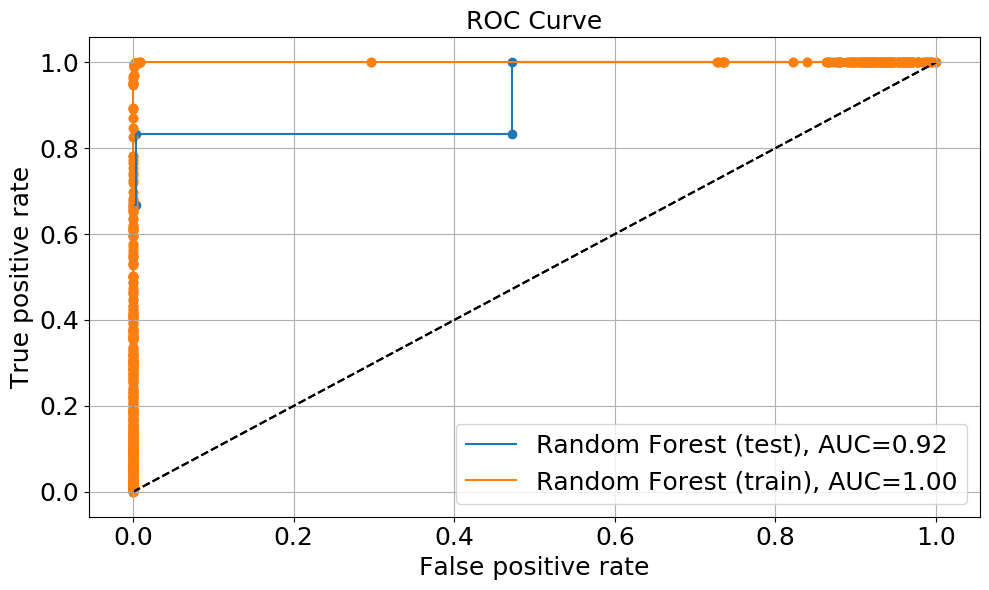

In [260]:
# draw out a ROC curve on the retrained model by comparing predictions with y_test
import matplotlib.pyplot as plt
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));   
ax = plt.subplot(1, 1, 1);
plot_roc(rfc, X_test[list(X_train_rfc)], y_test, "Random Forest (test)", ax)
plot_roc(rfc, X_train_rfc, y_train, "Random Forest (train)", ax)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

Text(0.5, 1.0, 'Precision-Recall curve (train): AP=1.00')

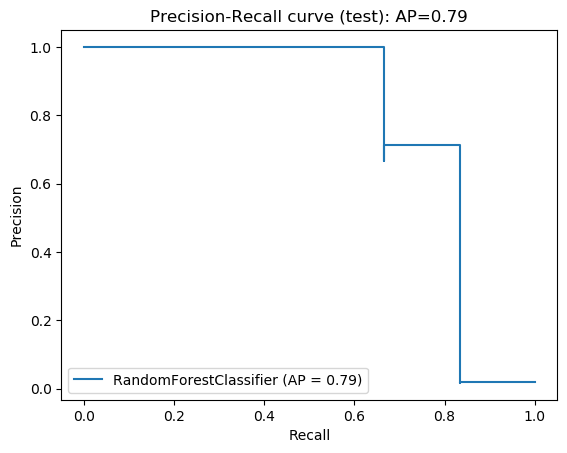

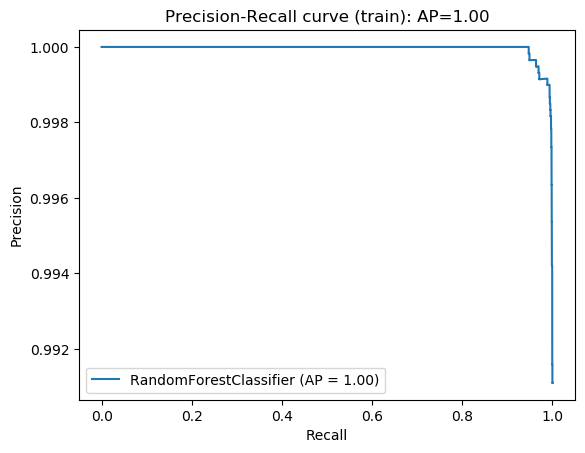

In [261]:
# display PR curves
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score

y_score = rfc.predict_proba(X_test[list(X_train_rfc)])[:, 1]
average_precision = average_precision_score(y_test, y_score)
disp = plot_precision_recall_curve(rfc, X_test[list(X_train_rfc)], y_test)
disp.ax_.set_title('Precision-Recall curve (test): '
                   'AP={0:0.2f}'.format(average_precision))

y_score = rfc.predict_proba(X_train_rfc)[:, 1]
average_precision = average_precision_score(y_train, y_score)
disp = plot_precision_recall_curve(rfc, X_train_rfc, y_train)
disp.ax_.set_title('Precision-Recall curve (train): '
                   'AP={0:0.2f}'.format(average_precision))

# AdaBoost

In [250]:
# Recursive Feature Elimination to find the 45 features with 5% rounddown/step with AdaBoost
from sklearn.ensemble import AdaBoostClassifier
estimator = AdaBoostClassifier(random_state=random)

%time X_train_adb = RFE_with_df_output(X_train,y_train,estimator,45,0.05)

X_train_adb

Wall time: 43min 11s


,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation) + (net profit + depreciation) / total liabilities,sales / fixed assets + sales / total assets,(net profit + depreciation) / total liabilities + working capital / total assets,operating expenses / total liabilities + profit on sales / sales,(inventory * 365) / cost of products sold + [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,(gross profit + depreciation) / sales + retained earnings / total assets,(gross profit + depreciation) / sales + sales (n) / sales (n-1),operating expenses / total liabilities + profit on operating activities / financial expenses,constant capital / total assets + short-term liabilities / total assets,(sales - cost of products sold) / sales * working capital,...,gross profit (in 3 years) / total assets - gross profit / short-term liabilities,gross profit / short-term liabilities - operating expenses / total liabilities,profit on operating activities / financial expenses - sales / short-term liabilities,gross profit / short-term liabilities - profit on operating activities / financial expenses,(current assets - inventories) / long-term liabilities - [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,EBITDA (profit on operating activities - depreciation) / sales - operating expenses / total liabilities,sales / total assets - total sales / total assets,gross profit (in 3 years) / total assets - operating expenses / total liabilities,net profit / inventory - profit on operating activities / financial expenses,gross profit (in 3 years) / total assets - retained earnings / total assets
0,-0.019969,-0.029663,-0.004941,-0.026233,0.007469,-0.012531,-0.016307,-0.035648,-0.039934,0.002824,...,0.003755,0.027351,-0.035493,0.035621,-0.010426,0.020212,0.261677,0.020560,0.036364,-0.013711
1,0.016926,-0.040488,-0.033679,-0.071421,0.006941,-0.011996,-0.016096,-0.035762,-0.039962,0.003775,...,-0.006809,0.143337,-0.035543,0.035694,-0.010920,0.035204,0.261677,0.090583,0.036446,-0.015623
2,-0.059735,-0.040471,-0.014639,-0.109185,0.008042,-0.011997,-0.016274,-0.038223,-0.043645,0.003457,...,0.007959,0.192298,-0.038017,0.038116,-0.008101,0.043366,0.037409,0.132600,0.038849,-0.037040
3,-0.025941,-0.039999,-0.042995,-0.109784,0.005960,-0.011593,-0.016921,-0.038211,-0.039863,0.002939,...,0.006942,0.197959,-0.037965,0.038103,-0.010518,0.044299,-0.092159,0.135692,0.038848,-0.038725
4,-0.011439,-0.038992,-0.012401,-0.012102,0.006450,-0.012594,-0.015591,-0.036577,-0.040084,0.003420,...,0.002249,0.002417,-0.036455,0.036564,-0.009149,0.016236,0.261677,0.003059,0.037298,-0.009988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12060,-0.097818,-0.040413,-0.074038,-0.040012,0.005322,-0.013337,-0.017266,-0.038132,-0.049356,0.002622,...,0.017374,0.018827,-0.038014,0.038082,-0.010253,0.021953,0.241233,0.023735,0.038816,-0.033670
12061,-0.113003,-0.040520,-0.071151,-0.046509,0.005893,-0.013433,-0.017340,-0.038176,-0.046642,0.002608,...,0.018552,0.026428,-0.038037,0.038119,-0.010728,0.023533,0.234756,0.029536,0.038852,-0.038432
12062,-0.118644,-0.040796,-0.078160,-0.053957,0.005829,-0.013643,-0.017485,-0.038184,-0.041691,0.002677,...,0.017352,0.044429,-0.038024,0.038120,-0.010041,0.026190,0.248454,0.040688,0.038853,-0.037843
12063,-0.089061,-0.040493,-0.063034,-0.048086,0.006082,-0.013794,-0.016970,-0.038145,-0.044045,0.003158,...,0.011808,0.043423,-0.037985,0.038089,-0.010421,0.024859,0.219009,0.036429,0.038823,-0.027956


In [257]:
# figure out the time it takes to perform 1 iteration of randomsearch
adb = AdaBoostClassifier()

hyperparams = {'learning_rate':[1.,0.8,0.6,0.4,0.2,1.2,1.4,1.6,1.8],
               'algorithm': ['SAMME','SAMME.R'],
               'n_estimators': [25,50,100,200,500],
               'random_state':[random]}

search = RandomizedSearchCV(adb,hyperparams,cv=20,scoring='roc_auc',return_train_score=False,error_score=0.0,n_jobs=-1,n_iter=1, random_state=random)

%time search.fit(X_train_adb, y_train)

Wall time: 15.3 s


RandomizedSearchCV(cv=20, error_score=0.0,
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=None),
                   iid='deprecated', n_iter=1, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [1.0, 0.5, 1.5],
                                        'n_estimators': [25, 50, 100, 200],
                                        'random_state': [42]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring='roc_auc', verbose=0)

In [262]:
# fine tune parameters for iteration that will take around 30 minutes
iteration = 60


search = RandomizedSearchCV(adb,hyperparams,cv=20,scoring='roc_auc',return_train_score=False,error_score=0.0,n_jobs=-1,n_iter=iteration, random_state=random)

%time search.fit(X_train_adb, y_train)

print(search.best_score_)
print(search.best_params_)
print(search.best_estimator_)

C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 24 is smaller than n_iter=60. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Wall time: 14min 12s
0.9976365934793738
{'random_state': 42, 'n_estimators': 200, 'learning_rate': 1.0, 'algorithm': 'SAMME.R'}
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=200, random_state=42)


In [264]:
# re-train model with the best parameter found above and print out its important features found by the model
adb = search.best_estimator_
%time adb.fit(X_train_adb, y_train)

Wall time: 14.1 s


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=200, random_state=42)

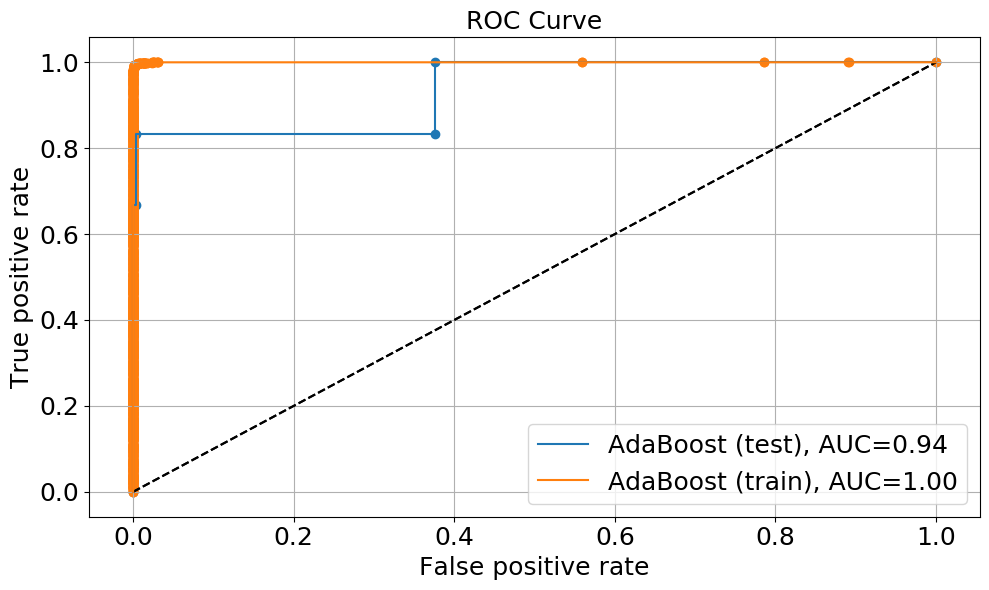

In [265]:
# draw out a ROC curve on the retrained model by comparing predictions with y_test
import matplotlib.pyplot as plt
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));   
ax = plt.subplot(1, 1, 1);
plot_roc(adb, X_test[list(X_train_adb)], y_test, "AdaBoost (test)", ax)
plot_roc(adb, X_train_adb, y_train, "AdaBoost (train)", ax)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

Text(0.5, 1.0, 'Precision-Recall curve (train): AP=1.00')

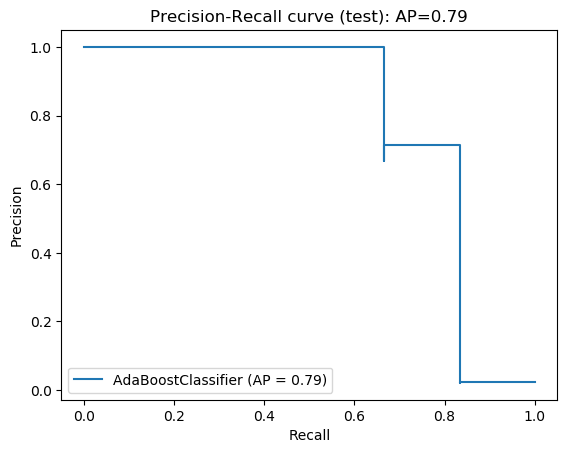

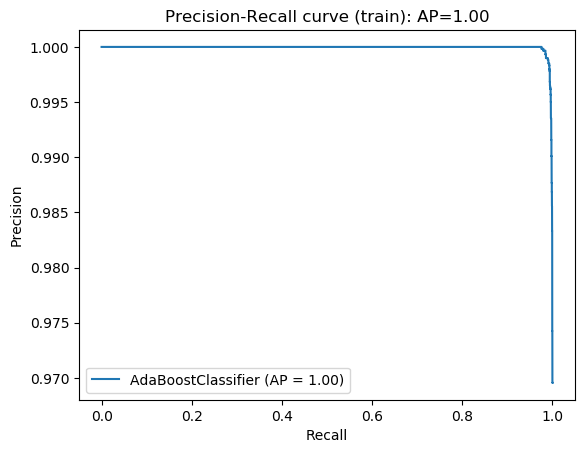

In [266]:
y_score = adb.predict_proba(X_test[list(X_train_adb)])[:, 1]
average_precision = average_precision_score(y_test, y_score)
disp = plot_precision_recall_curve(adb, X_test[list(X_train_adb)], y_test)
disp.ax_.set_title('Precision-Recall curve (test): '
                   'AP={0:0.2f}'.format(average_precision))

y_score = adb.predict_proba(X_train_adb)[:, 1]
average_precision = average_precision_score(y_train, y_score)
disp = plot_precision_recall_curve(adb, X_train_adb, y_train)
disp.ax_.set_title('Precision-Recall curve (train): '
                   'AP={0:0.2f}'.format(average_precision))

# GradientBoost

In [251]:
# Recursive Feature Elimination to find the 45 features with 5% rounddown/step with GradientBoost
from sklearn.ensemble import GradientBoostingClassifier
estimator = GradientBoostingClassifier(random_state=random)

%time X_train_gbc = RFE_with_df_output(X_train,y_train,estimator,45,0.05)

X_train_gbc

Wall time: 3h 33min 51s


,net profit / sales + sales / total assets,(sales - cost of products sold) / sales + total costs /total sales,net profit / inventory + operating expenses / total liabilities,operating expenses / total liabilities + total liabilities / ((profit on operating activities + depreciation) * (12/365)),operating expenses / total liabilities + profit on operating activities / financial expenses,constant capital / total assets + short-term liabilities / total assets,net profit / sales * profit on operating activities / financial expenses,gross profit / short-term liabilities * retained earnings / total assets,profit on operating activities / financial expenses * total liabilities / ((profit on operating activities + depreciation) * (12/365)),operating expenses / total liabilities * total liabilities / ((profit on operating activities + depreciation) * (12/365)),...,sales / total assets - total sales / total assets,net profit / inventory - profit on operating activities / financial expenses,(equity - share capital) / total assets - operating expenses / total liabilities,profit on operating activities / financial expenses - working capital / fixed assets,(equity - share capital) / total assets - profit on operating activities / financial expenses,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation) - operating expenses / total liabilities,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation) - profit on operating activities / financial expenses,gross profit (in 3 years) / total assets - profit on operating activities / sales,operating expenses / total liabilities - sales / short-term liabilities,net profit / sales - operating expenses / total liabilities
0,-0.037901,-0.140705,0.009638,-0.057341,-0.035648,-0.039934,-0.023510,-0.030837,0.004032,-0.051346,...,0.261677,0.036364,0.000202,-0.036036,0.035610,0.053461,0.035636,-0.004012,0.420992,0.011341
1,-0.041266,0.014033,0.009273,-0.129514,-0.035762,-0.039962,-0.023113,-0.030837,0.004138,-0.055425,...,0.261677,0.036446,0.049515,-0.035652,0.035676,0.168516,0.035717,-0.007653,0.331033,0.059015
2,-0.045206,-0.019597,0.008717,-0.178667,-0.038223,-0.043645,-0.024297,-0.026804,0.003146,-0.059167,...,0.037409,0.038849,0.094817,-0.038108,0.038115,0.190606,0.038128,-0.007265,0.069368,0.086099
3,-0.043631,-0.019573,0.008846,-0.179847,-0.038211,-0.039863,-0.024290,-0.025298,0.003158,-0.058927,...,-0.092159,0.038848,0.090261,-0.038071,0.038096,0.213797,0.038124,-0.007857,0.202580,0.089180
4,-0.035081,-0.027916,0.009740,-0.037571,-0.036577,-0.040084,-0.023836,-0.030837,0.003631,-0.051270,...,0.261677,0.037298,-0.010926,-0.036557,0.036554,0.030082,0.036578,-0.002274,0.390842,-0.001553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12060,-0.035727,-0.059956,0.009384,-0.053754,-0.038132,-0.049356,-0.024299,-0.030837,0.003207,-0.004172,...,0.241233,0.038816,0.004696,-0.038039,0.038078,0.053602,0.038100,-0.008395,0.218942,0.017655
12061,-0.039072,-0.075473,0.009293,-0.042222,-0.038176,-0.046642,-0.024300,-0.030837,0.003104,0.040804,...,0.234756,0.038852,0.009681,-0.038085,0.038115,0.058984,0.038136,-0.009971,0.255745,0.022759
12062,-0.042021,-0.037355,0.009206,-0.063197,-0.038184,-0.041691,-0.024301,-0.030893,0.003130,0.016228,...,0.248454,0.038853,0.014162,-0.038081,0.038113,0.073058,0.038136,-0.011145,0.277923,0.030454
12063,-0.040146,-0.017578,0.009307,-0.060255,-0.038145,-0.044045,-0.024293,-0.032909,0.003154,0.008109,...,0.219009,0.038823,0.013840,-0.038054,0.038083,0.073869,0.038107,-0.009409,0.312549,0.026855


In [268]:
# figure out the time it takes to perform 1 iteration of randomsearch

gbc = GradientBoostingClassifier()

hyperparams = {'loss':['deviance','exponential'],
               'learning_rate': [0.1,0.05,0.15,0.01,1],
               'n_estimators': [50,100,150,200,500],
               'max_depth':[3,5,7,9,1],
               'max_features':['auto','log2',None],
               'warm_start':[True,False],
               'random_state':[random]}

search = RandomizedSearchCV(gbc,hyperparams,cv=20,scoring='roc_auc',return_train_score=False,error_score=0.0,n_jobs=-1,n_iter=1, random_state=random)

%time search.fit(X_train_gbc, y_train)

Wall time: 56.6 s


RandomizedSearchCV(cv=20, error_score=0.0,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                   

In [269]:
# fine tune parameters for iteration that will take around 30 minutes
iteration = 30


search = RandomizedSearchCV(gbc,hyperparams,cv=20,scoring='roc_auc',return_train_score=False,error_score=0.0,n_jobs=-1,n_iter=iteration, random_state=random)

%time search.fit(X_train_gbc, y_train)

print(search.best_score_)
print(search.best_params_)
print(search.best_estimator_)

Wall time: 34min 37s
0.9984171856009828
{'warm_start': True, 'random_state': 42, 'n_estimators': 500, 'max_features': 'log2', 'max_depth': 3, 'loss': 'exponential', 'learning_rate': 1}
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1, loss='exponential', max_depth=3,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=True)


In [270]:
# re-train model with the best parameter found above and print out its important features found by the model
gbc = search.best_estimator_
%time gbc.fit(X_train_gbc, y_train)

Wall time: 66 ms


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1, loss='exponential', max_depth=3,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=True)

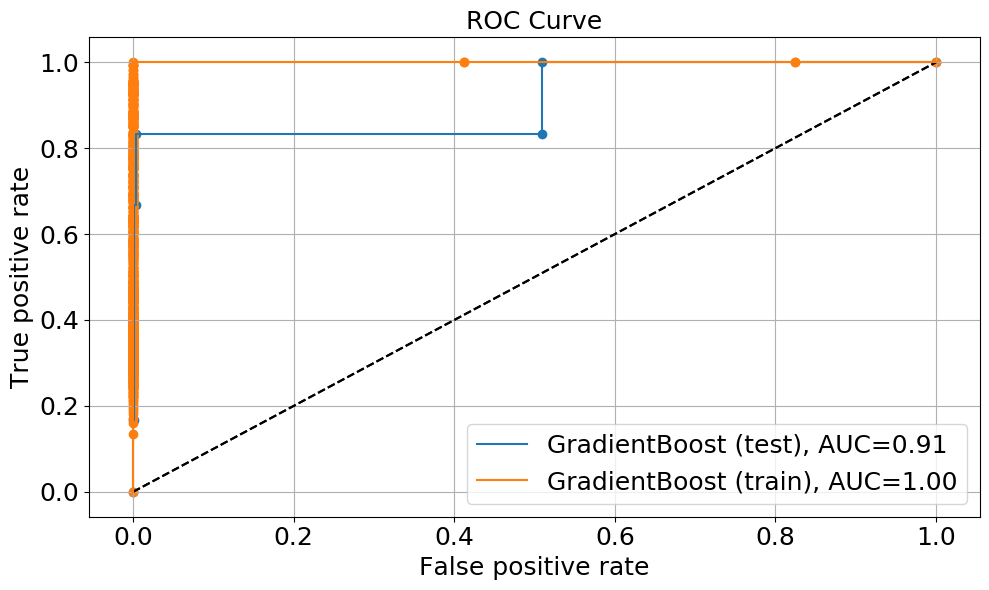

In [271]:
# draw out a ROC curve on the retrained model by comparing predictions with y_test
import matplotlib.pyplot as plt
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));   
ax = plt.subplot(1, 1, 1);
plot_roc(gbc, X_test[list(X_train_gbc)], y_test, "GradientBoost (test)", ax)
plot_roc(gbc, X_train_gbc, y_train, "GradientBoost (train)", ax)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

Text(0.5, 1.0, 'Precision-Recall curve (train): AP=1.00')

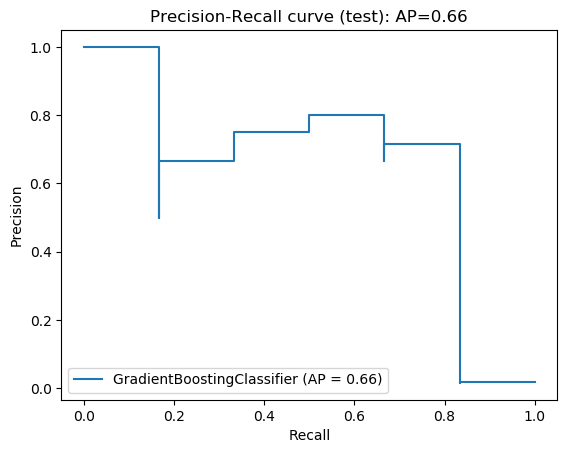

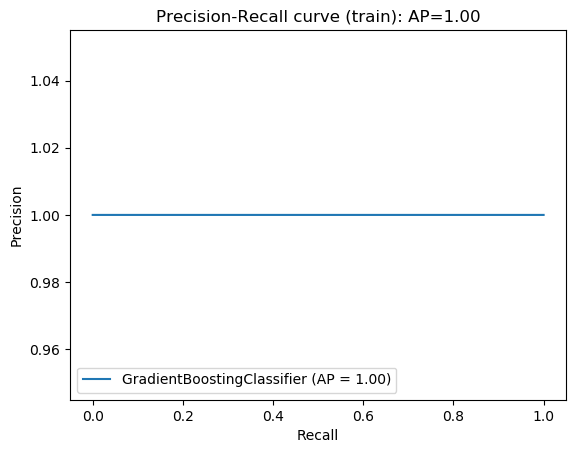

In [273]:
# display PR curves
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score

y_score = gbc.predict_proba(X_test[list(X_train_gbc)])[:, 1]
average_precision = average_precision_score(y_test, y_score)
disp = plot_precision_recall_curve(gbc, X_test[list(X_train_gbc)], y_test)
disp.ax_.set_title('Precision-Recall curve (test): '
                   'AP={0:0.2f}'.format(average_precision))

y_score = gbc.predict_proba(X_train_gbc)[:, 1]
average_precision = average_precision_score(y_train, y_score)
disp = plot_precision_recall_curve(gbc, X_train_gbc, y_train)
disp.ax_.set_title('Precision-Recall curve (train): '
                   'AP={0:0.2f}'.format(average_precision))

# ExtraTreesClassifier

In [252]:
# Recursive Feature Elimination to find the 45 features with 5% rounddown/step with ExtraTree
from sklearn.ensemble import ExtraTreesClassifier
estimator = ExtraTreesClassifier(random_state=random, n_jobs= -1)

%time X_train_etc = RFE_with_df_output(X_train,y_train,estimator,45,0.05)

X_train_etc

Wall time: 1min 23s


,gross profit (in 3 years) / total assets,constant capital / total assets + working capital / total assets,EBIT / total assets + gross profit (in 3 years) / total assets,profit on operating activities / sales + total costs /total sales,gross profit (in 3 years) / total assets + working capital / total assets,(net profit + depreciation) / total liabilities + current assets / short-term liabilities,(current assets - inventory) / short-term liabilities + (net profit + depreciation) / total liabilities,constant capital / total assets + gross profit (in 3 years) / total assets,profit on operating activities / financial expenses + short-term liabilities / total assets,(net profit + depreciation) / total liabilities + profit on sales / total assets,...,(current assets - inventory) / short-term liabilities - current assets / short-term liabilities,(current assets - inventory - receivables) / short-term liabilities - (current assets - inventory) / short-term liabilities,gross profit (in 3 years) / total assets - profit on operating activities / total assets,sales / total assets - total sales / total assets,EBIT / total assets - retained earnings / total assets,gross profit (in 3 years) / total assets - short-term liabilities / total assets,EBITDA (profit on operating activities - depreciation) / sales - gross profit (in 3 years) / total assets,short-term liabilities / total assets - working capital / total assets,gross profit (in 3 years) / total assets - profit on sales / total assets,profit on operating activities / total assets - retained earnings / total assets
0,-0.017967,-0.028148,-0.015234,-0.011999,0.007867,-0.067113,-0.071161,-0.036446,-0.035628,-0.045926,...,-0.018296,-0.003817,-0.024253,0.261677,-0.002989,-0.018485,0.016171,-0.030330,-0.016875,-0.001447
1,-0.019855,-0.033790,-0.014024,-0.011999,-0.007946,-0.095203,-0.082640,-0.036626,-0.035698,-0.042053,...,0.115262,0.182822,-0.035943,0.261677,0.002797,-0.018943,0.017164,-0.012730,-0.033662,0.004053
2,-0.029687,-0.026279,-0.030358,-0.011996,-0.003739,-0.038242,-0.048102,-0.038350,-0.038134,-0.061370,...,-0.068696,-0.072700,-0.027616,0.037409,-0.038979,-0.015940,0.016922,-0.047207,-0.024960,-0.029932
3,-0.028526,-0.037338,-0.025177,-0.011999,-0.018428,-0.107448,-0.089126,-0.041291,-0.038113,-0.057404,...,0.162051,0.195195,-0.037522,-0.092159,-0.032457,-0.032577,0.017238,-0.001315,-0.033375,-0.025356
4,-0.014294,-0.031060,-0.011853,-0.011998,0.003480,-0.076493,-0.105552,-0.034908,-0.036570,-0.035750,...,-0.209428,0.304840,-0.021941,0.261677,-0.000360,-0.013738,0.015693,-0.021649,-0.019468,0.001879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12060,-0.037660,-0.042642,-0.038482,-0.011999,-0.029684,-0.118672,-0.112873,-0.047373,-0.038105,-0.095741,...,0.067601,0.143416,-0.031850,0.241233,-0.029491,-0.029545,0.017282,-0.012876,-0.027496,-0.022576
12061,-0.042360,-0.037488,-0.042860,-0.011999,-0.029466,-0.108562,-0.116859,-0.046334,-0.038144,-0.102145,...,-0.043082,0.141665,-0.036808,0.234756,-0.032982,-0.032424,0.017704,-0.020970,-0.031288,-0.025459
12062,-0.043641,-0.033257,-0.043740,-0.012003,-0.033234,-0.115173,-0.106920,-0.042478,-0.038146,-0.102119,...,0.085865,0.038468,-0.042240,0.248454,-0.030356,-0.032038,0.018132,-0.019535,-0.037007,-0.020952
12063,-0.038677,-0.035631,-0.037541,-0.012008,-0.025193,-0.105848,-0.108837,-0.044013,-0.038110,-0.088921,...,-0.002658,0.102128,-0.036645,0.219009,-0.015605,-0.031363,0.017652,-0.019082,-0.035328,-0.011742


In [274]:
# figure out the time it takes to perform 1 iteration of randomsearch

etc = ExtraTreesClassifier()

hyperparams = {'max_features':['auto','log2'],
               'criterion': ['gini','entropy'],
               'warm_start':[True,False],
               'n_estimators': [5,10,50,100,200],
               'max_depth':[None,5,7,10,50],
               'min_samples_leaf':[1,2,4,6,8],
               'random_state':[random]}

search = RandomizedSearchCV(etc,hyperparams,cv=20,scoring='roc_auc',return_train_score=False,error_score=0.0,n_jobs=-1,n_iter=1, random_state=random)

%time search.fit(X_train_etc, y_train)

Wall time: 2.61 s


RandomizedSearchCV(cv=20, error_score=0.0,
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                       

In [ ]:
# fine tune parameters for iteration that will take around 30 minutes
iteration = 1000


search = RandomizedSearchCV(etc,hyperparams,cv=20,scoring='roc_auc',return_train_score=False,error_score=0.0,n_jobs=-1,n_iter=iteration, random_state=random)

%time search.fit(X_train_etc, y_train)

print(search.best_score_)
print(search.best_params_)
print(search.best_estimator_)

In [ ]:
# re-train model with the best parameter found above and print out its important features found by the model
etc = search.best_estimator_
%time rfc.fit(X_train_etc, y_train)